In this workbook, we are going to build a model that interprets unknown temperature units into celcius. To do this, the model will adjust the weights of the model iteratively until a measure of error is low enough.

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

In [6]:
# THE DATA

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] # temps in celcius

t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] # temps in unknown unit

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

Text(0, 0.5, 'celcius')

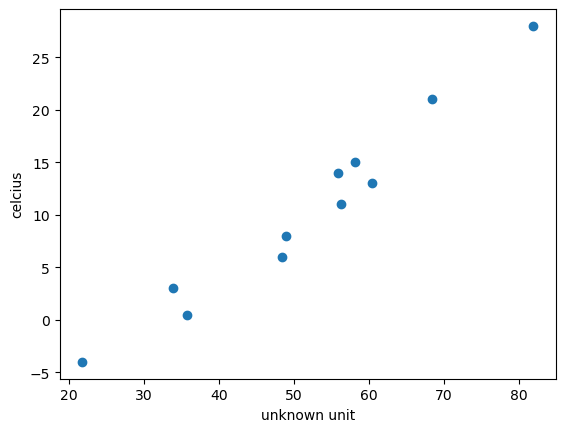

In [7]:
# plotting the data - looks like a linear relationship!
fig, ax = plt.subplots()
ax.scatter(t_u, t_c)
ax.set_xlabel('unknown unit')
ax.set_ylabel('celcius')

### Linear Relationships
Since we can see there is a linear relationship between the two data sets, we can map out a linear relationship:
$$celcius~=~w\times unknown~unit + b$$
We can stick to the terms *weight* and *bias* for *w* and *b*. These are the *parameters* in our model.

### Loss Function
A *loss function* is a function that computes a single numerical value that the learning process will attempt to minimize. We need to ensure that the loss function returns a positive value for $predicted > actual$ and $predicted < actual$. For this we will use:
$$ (predicted - actual)^2$$

In [8]:
#writing our model as a function
def model(t_u, w, b):
    '''Where t_u is the unknown units, w is weight, b is bias'''
    return w * t_u + b

#writing our loss function
def loss_fn(t_p, t_c):
    '''Where t_p is the predicted value in celcius, t_c is the actual value in celcius'''
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()